# Por: Juan Esteban Ospina Holguín y Mariana Toro Escobar.

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

**1.** Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 

a) Diagonalize $A$.<br> 

In [2]:
x1 = np.array([2, -1, 1])
x2 = np.array([0, 3, -1])
x3 = np.array([2, 1, +3])
A = np.asmatrix([x1,x2,x3])#Se Extrae ma matriz A asociada al sistema
E, U = la.eig(A) #Se calculan los vectores y autovalores 
U = np.asmatrix(U)#Matriz con los autovectores
np.diag(E, 0).round()#matriz diagonal con los autovalores

array([[4.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.-0.j]])

b) Use el hecho de que $f(A) = U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>.

In [3]:
r0=np.matrix([1,1,2])#Condición inicial
time = np.linspace(0,2,1000)#Tiempo en el que se evalúa 
x = np.zeros(len(time))#Array de ceros para la posición x
y = np.zeros(len(time))#Array de ceros para la posición y
z = np.zeros(len(time))#Array de ceros para la posición z
f = lambda t: np.exp(E*t) #Función F(D)
k =0 #Contador para asignar los datos
for t in time:
    FD = f(t)#Se calcula f(t)
    FD = np.diag(f(t),0)
    r = (U@FD@U.I)@r0.T #Se hace la multiplicación matricial para encontrar r
    x[k]=np.real(r[0])#Se asigna un dato al array de ceros
    y[k]=np.real(r[1])
    z[k]=np.real(r[2])
    k = k+1

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 

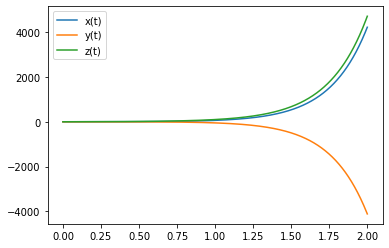

In [4]:
plt.plot(time,x, label ='x(t)')
plt.plot(time,y, label = 'y(t)')
plt.plot(time,z, label = 'z(t)')
plt.legend();

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

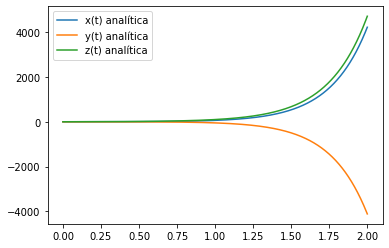

In [5]:
r = [1,1,2]
def X(t):
    x = r[0]*(np.exp(2*t)*(1+np.exp(2*t)-2*t))+r[1]*(-2*t*np.exp(2*t))+r[2]*(np.exp(2*t)*(-1+np.exp(2*t)))
    return x/2
def Y(t):
    y = r[0]*(-np.exp(2*t)*(-1+np.exp(2*t)-2*t))+r[1]*(2*(t+1)*np.exp(2*t))+r[2]*(-np.exp(2*t)*(-1+np.exp(2*t)))
    return y/2
def Z(t):
    z = r[0]*(np.exp(2*t)*(-1+np.exp(2*t)+2*t))+r[1]*2*t*np.exp(2*t)+r[2]*np.exp(2*t)*(1+np.exp(2*t))
    return z/2
plt.plot(time,X(time),label ='x(t) analítica')
plt.plot(time,Y(time),label ='y(t) analítica')
plt.plot(time,Z(time),label ='z(t) analítica')
plt.legend();

Con esto, se concluye que las graficas de las soluciones calculadas (item C) y las soluciones analíticas que se muestran son iguales.

**2.** Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
A = matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?



```
# abc=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']
num=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']
```



In [6]:
"""
  Decodificación del mensaje.
"""

# Mensaje encriptado
A = np.array([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

B = np.array([[47, 49, -19, 257, 487],
              [10, -9, 63, 137, 236],
              [79, 142, -184, 372, 536],
              [59, 70, -40, 332, 588]])

# Inversa de la matriz A
I = np.linalg.inv(A)

# Producto escalar entre B y la inversa de A
P = np.dot(B, I)

# Diccionario con las claves
dic = {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K',
       12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U',
       22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: ' '}

mensaje = ''
for i in range(P.shape[0]):
  for j in range(P.shape[1]):
    mensaje += dic[P[i, j].round()]
print("El mensaje es:", mensaje)

El mensaje es: ARE YOU HAVING FUN  


3. Construir un programa que permita realizar la multiplicacion de dos matrices. El programa debe establecer si las matrices se pueden multiplicar.

In [7]:
"""
  Multiplicación de dos matrices.
"""

# Considerando C la matriz de la izquierda y D la matriz de la derecha
def product(C, D):
# Matrices C y D
  try: 
    C = np.array(C)
    D = np.array(D)
# Matriz producto
    M = np.zeros((C.shape[0], D.shape[1]))
    for i in range(C.shape[0]):
      fila = C[i]
      for j in range(D.shape[1]):
        columna = D[:, j]
        M[i, j] = (fila*columna).sum()
    return M
  except TypeError:
    return "Estas matrices no pueden multiplicarse"
  except ValueError:
    return "Estas matrices no pueden multiplicarse"

In [8]:
C = np.array([[1, 2], [-2, 0]])
print("C =", C)
D = np.array([[1, 0, 2], [0, 2, 0]])
print("D =", D)

print(" \n C ⋅ D = M \n M =", product(C,D))

C = [[ 1  2]
 [-2  0]]
D = [[1 0 2]
 [0 2 0]]
 
 C ⋅ D = M 
 M = [[ 1.  4.  2.]
 [-2.  0. -4.]]
